# Parameter sweep for manueverMotifs
## Aggressive trip in motorway - Longitudinal acceleration

### 28/02/2019

***

**Contents**

1. [Data and library imports](#section1)
    * Package imports
    * Global parameters (R = 0.1 ; alphabet_size = 5 ; adaptive_break_points = False)
2. [Parameter sweep - 2Hz](#section2)
    * 2 seconds windows & 4 letter sax words
    * 2 seconds windows & 2 letter sax words
    * 4 seconds windows & 4 letter sax words
    * 4 seconds windows & 2 letter sax words
3. [Parameter sweep - 4Hz](#section3)
    * 2 seconds windows & 4 letter sax words (*)
    * 2 seconds windows & 2 letter sax words (*)
4. [Parameter sweep - 10Hz](#section4)
    * 2 seconds windows & 4 letter sax words 
    * 2 seconds windows & 2 letter sax words (*)
    * 1 second windows & 2 letter sax words
5. [Summary table](#section5)

***

<a id='section1'></a>
## 1. Data and library imports

### Package imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import pandas as pd
from extendedMD.emd import find_motifs_from_emd
from extendedMD.pruning import prune_motifs_with_mdl

# local code
import sys
import os
sys.path.insert(0, os.path.abspath('../scripts'))
import uah_utils
import motif_utils
import lon_viz

In [3]:
import warnings
warnings.filterwarnings('ignore')

### Global parameters

In [4]:
cwd = os.getcwd()
data_folder = os.path.abspath(os.path.join(cwd, os.pardir, os.pardir, 'data-uah/D6'))

R = 0.1
alphabet_size = 5
adaptive_break_points = False

lon_results_list=[]

<a id='section2'></a>
## 2. Parameter sweep - 2Hz

In [5]:
freq_per_second = 2

### 2.1) 2 seconds windows & 4-letter sax words

In [6]:
paa_size = 4
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['az'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
ExtendedMD algorithm run in 3.26 minutes


1464

In [7]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_lon_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,acc_events,acc_ratio,brake_events,brake_ratio
0,[ddcc],10535.93,0.01,4,44,3,0.068182,0,0.00000
1,[aaaa],11214.15,0.05,5,32,0,0.000000,17,0.53125
2,"[aaaa, aaad, aade, adee, deee, eeee]",14465.69,0.04,10,5,3,0.600000,3,0.60000


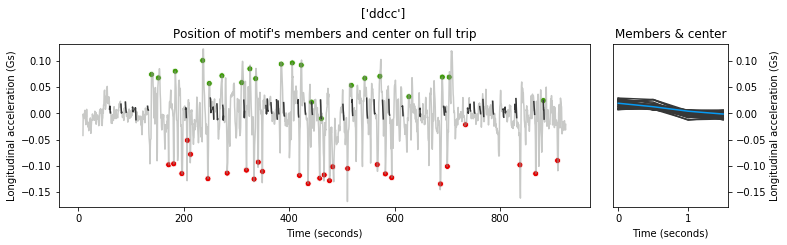

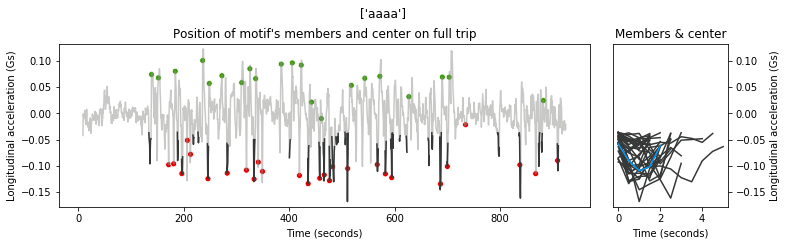

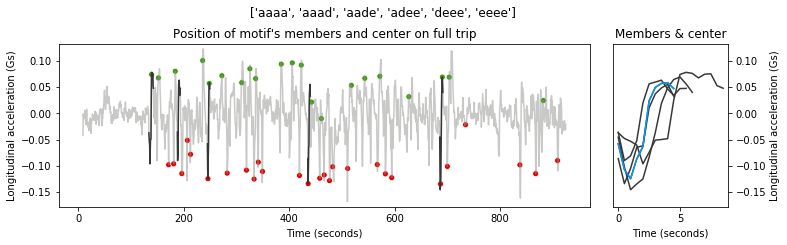

In [8]:
lon_viz.plot_k_lon_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [9]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,250,258,['aaaa'],134.0,138.0
1,358,361,['aaaa'],188.0,189.5
2,374,378,['aaaa'],196.0,198.0
3,417,421,['aaaa'],217.5,219.5
4,436,439,['aaaa'],227.0,228.5
5,472,476,['aaaa'],245.0,247.0
6,546,550,['aaaa'],282.0,284.0
7,647,652,['aaaa'],332.5,335.0
8,783,786,['aaaa'],400.5,402.0
9,853,857,['aaaa'],435.5,437.5


In [10]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "acc_detection_rate": motif_utils.compute_acc_detection_rate(pruned_motif_dic_list, trip_df),
    "brake_detection_rate": motif_utils.compute_brake_detection_rate(pruned_motif_dic_list, trip_df),
}
lon_results_list.append(results_dic)

### 2.2) 2 seconds windows &  2-letter sax words

In [11]:
paa_size = 2
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['az'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
ExtendedMD algorithm run in 2.17 minutes


947

In [12]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_lon_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,acc_events,acc_ratio,brake_events,brake_ratio
0,[dc],7965.09,0.02,5,86,3,0.034884,0,0.0
1,"[cc, ca, aa]",13977.09,0.03,17,3,0,0.000000,3,1.0
2,"[ba, aa, ac, ae, ce, ee, ed]",14227.51,0.05,17,4,2,0.500000,2,0.5


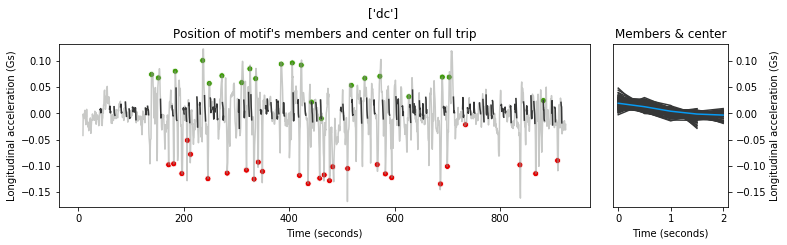

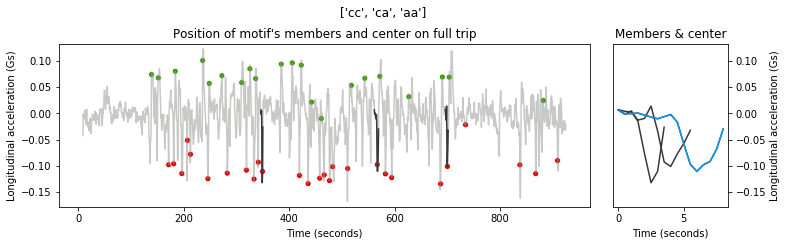

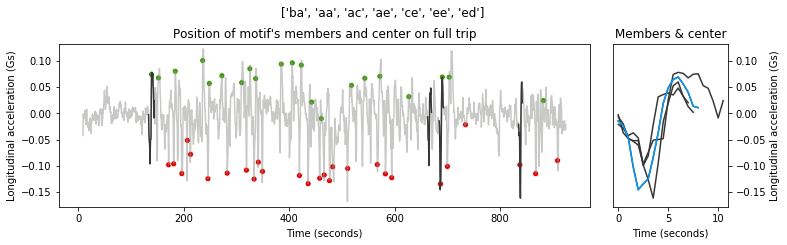

In [13]:
lon_viz.plot_k_lon_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [14]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,675,682,"['cc', 'ca', 'aa']",346.5,350.0
1,1105,1121,"['cc', 'ca', 'aa']",561.5,569.5
2,1374,1385,"['cc', 'ca', 'aa']",696.0,701.5
0,249,270,"['ba', 'aa', 'ac', 'ae', 'ce', 'ee', 'ed']",133.5,144.0
1,1307,1322,"['ba', 'aa', 'ac', 'ae', 'ce', 'ee', 'ed']",662.5,670.0
2,1351,1367,"['ba', 'aa', 'ac', 'ae', 'ce', 'ee', 'ed']",684.5,692.5
3,1652,1666,"['ba', 'aa', 'ac', 'ae', 'ce', 'ee', 'ed']",835.0,842.0


In [15]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "acc_detection_rate": motif_utils.compute_acc_detection_rate(pruned_motif_dic_list, trip_df),
    "brake_detection_rate": motif_utils.compute_brake_detection_rate(pruned_motif_dic_list, trip_df),
}
lon_results_list.append(results_dic)

### 2.3) 4 seconds windows & 4-letter sax words

In [16]:
paa_size = 4
win_size = freq_per_second * 4

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['az'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
ExtendedMD algorithm run in 2.22 minutes


978

In [17]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_lon_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,acc_events,acc_ratio,brake_events,brake_ratio
0,[dccc],11563.79,0.02,9,24,0,0.00,0,0.0
1,[aaac],13234.29,0.05,8,10,0,0.00,7,0.7
2,"[ceee, deee, eeee]",15397.90,0.05,13,4,3,0.75,0,0.0
3,"[eeba, edaa, ebaa, daaa]",16185.60,0.03,11,2,0,0.00,2,1.0


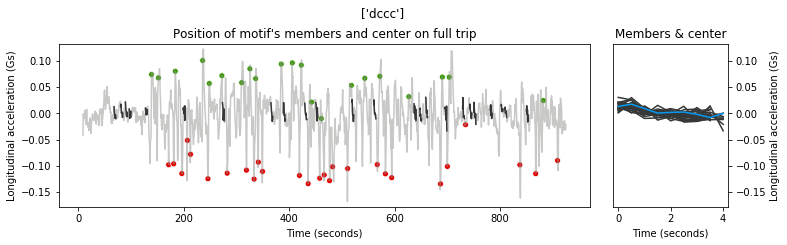

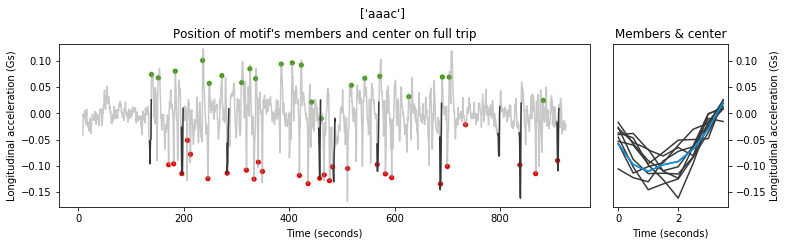

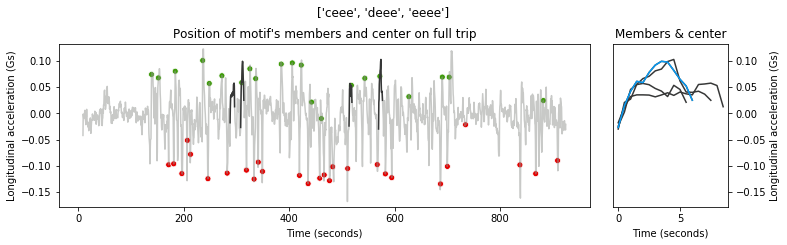

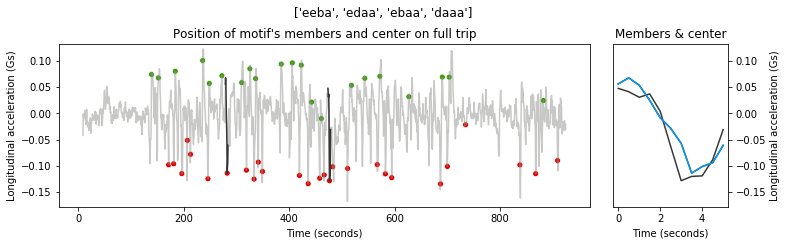

In [18]:
lon_viz.plot_k_lon_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [19]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,252,259,['aaac'],135.0,138.5
1,373,380,['aaac'],195.5,199.0
2,546,553,['aaac'],282.0,285.5
3,894,901,['aaac'],456.0,459.5
4,949,956,['aaac'],483.5,487.0
5,1115,1122,['aaac'],566.5,570.0
6,1353,1360,['aaac'],685.5,689.0
7,1574,1581,['aaac'],796.0,799.5
8,1655,1662,['aaac'],836.5,840.0
9,1798,1805,['aaac'],908.0,911.5


In [20]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "acc_detection_rate": motif_utils.compute_acc_detection_rate(pruned_motif_dic_list, trip_df),
    "brake_detection_rate": motif_utils.compute_brake_detection_rate(pruned_motif_dic_list, trip_df),
}
lon_results_list.append(results_dic)

### 2.4) 4 seconds windows &  2-letter sax words

In [21]:
paa_size = 2
win_size = freq_per_second * 4

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['az'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
ExtendedMD algorithm run in 1.84 minutes


730

In [22]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_lon_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,acc_events,acc_ratio,brake_events,brake_ratio
0,[dc],7773.10,0.05,8,53,3,0.056604,0,0.000000
1,"[ab, ad]",11361.93,0.06,9,11,1,0.090909,9,0.818182
2,"[ab, aa, ba]",15077.91,0.04,14,2,0,0.000000,1,0.500000


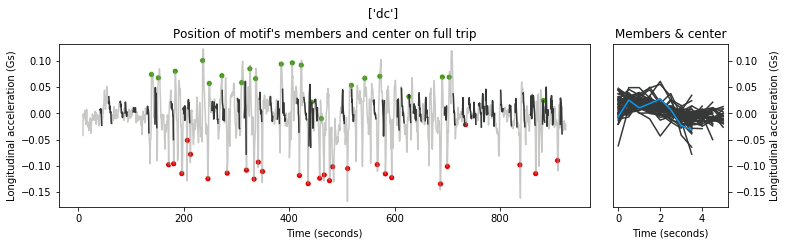

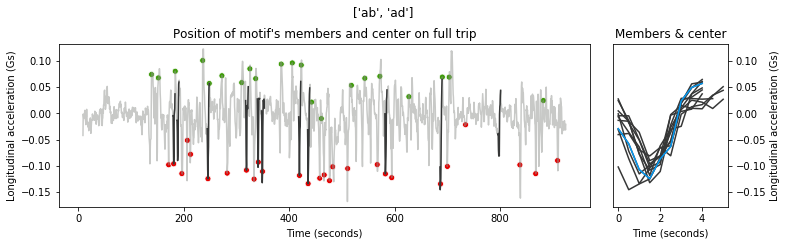

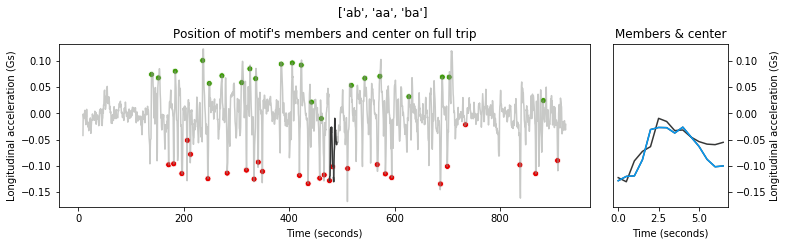

In [23]:
lon_viz.plot_k_lon_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [24]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,341,349,"['ab', 'ad']",179.5,183.5
1,356,364,"['ab', 'ad']",187.0,191.0
2,471,479,"['ab', 'ad']",244.5,248.5
3,617,627,"['ab', 'ad']",317.5,322.5
4,661,670,"['ab', 'ad']",339.5,344.0
5,677,687,"['ab', 'ad']",347.5,352.5
6,818,826,"['ab', 'ad']",418.0,422.0
7,852,860,"['ab', 'ad']",435.0,439.0
8,1145,1153,"['ab', 'ad']",581.5,585.5
9,1354,1362,"['ab', 'ad']",686.0,690.0


In [25]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "acc_detection_rate": motif_utils.compute_acc_detection_rate(pruned_motif_dic_list, trip_df),
    "brake_detection_rate": motif_utils.compute_brake_detection_rate(pruned_motif_dic_list, trip_df),
}
lon_results_list.append(results_dic)

<a id='section3'></a>
## 3. Parameter sweep - 4Hz

In [26]:
freq_per_second = 4

### 3.1) 2 seconds windows & 4-letter sax words

In [27]:
paa_size = 4
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['az'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
ExtendedMD algorithm run in 5.18 minutes


2191

In [28]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_lon_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,acc_events,acc_ratio,brake_events,brake_ratio
0,[dccc],21387.76,0.02,9,54,1,0.018519,0,0.000000
1,"[baaa, aaaa]",22894.58,0.06,11,37,0,0.000000,22,0.594595
2,"[beee, deee, eeee]",31586.30,0.04,16,4,4,1.000000,0,0.000000
3,"[bbaa, baaa, aaaa, aaac, aaae, aace, aaee, ace...",34417.05,0.03,21,2,1,0.500000,2,1.000000
4,"[aabd, aacd, abdd, acdd, bddd]",34786.25,0.03,12,2,0,0.000000,2,1.000000


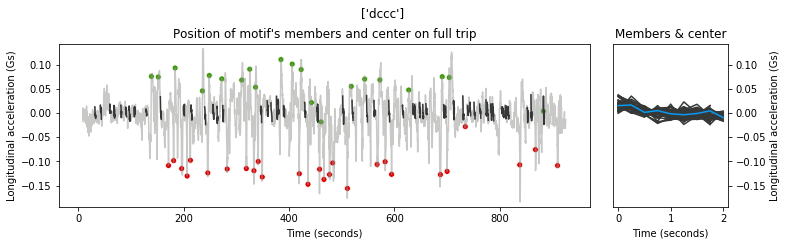

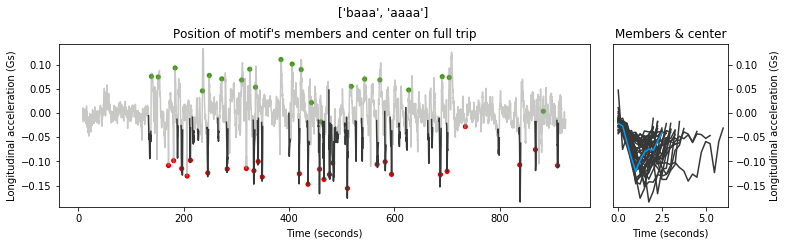

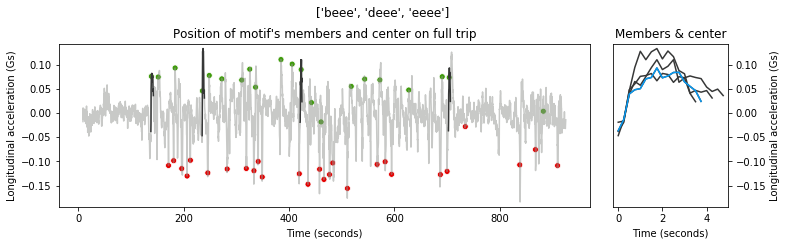

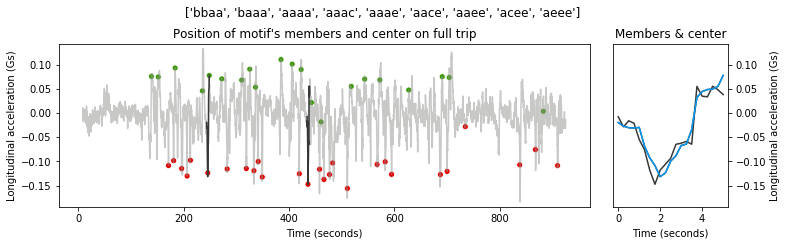

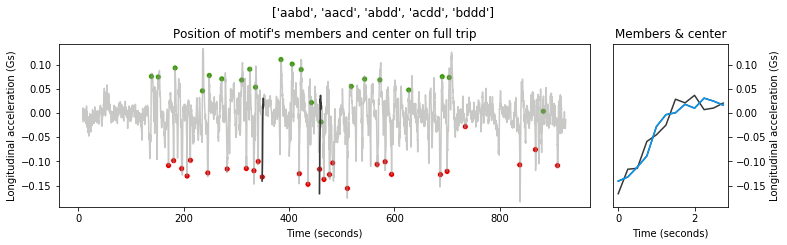

In [29]:
lon_viz.plot_k_lon_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [30]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,497,515,"['baaa', 'aaaa']",133.50,138.00
1,713,722,"['baaa', 'aaaa']",187.50,189.75
2,744,756,"['baaa', 'aaaa']",195.25,198.25
3,809,817,"['baaa', 'aaaa']",211.50,213.50
4,830,842,"['baaa', 'aaaa']",216.75,219.75
5,869,878,"['baaa', 'aaaa']",226.50,228.75
6,940,952,"['baaa', 'aaaa']",244.25,247.25
7,1023,1031,"['baaa', 'aaaa']",265.00,267.00
8,1088,1100,"['baaa', 'aaaa']",281.25,284.25
9,1291,1304,"['baaa', 'aaaa']",332.00,335.25


In [31]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "acc_detection_rate": motif_utils.compute_acc_detection_rate(pruned_motif_dic_list, trip_df),
    "brake_detection_rate": motif_utils.compute_brake_detection_rate(pruned_motif_dic_list, trip_df),
}
lon_results_list.append(results_dic)

### 3.2) 2 seconds windows &  2-letter sax words

In [32]:
paa_size = 2
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['az'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
ExtendedMD algorithm run in 3.52 minutes


1341

In [33]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_lon_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,acc_events,acc_ratio,brake_events,brake_ratio
0,[dc],14408.39,0.03,8,95,3,0.031579,0,0.000000
1,[aa],17674.63,0.06,13,52,0,0.000000,25,0.480769
2,"[ad, ae, be, ce, de, ee]",26720.23,0.04,16,6,2,0.333333,0,0.000000
3,"[ee, ed, ec, dc, cc, cb, bb, bc]",30174.87,0.03,41,2,2,1.000000,0,0.000000
4,"[dc, cc, cb, ca, ba, aa, ab, ac, ad, ae, be, c...",30185.74,0.04,38,2,0,0.000000,0,0.000000


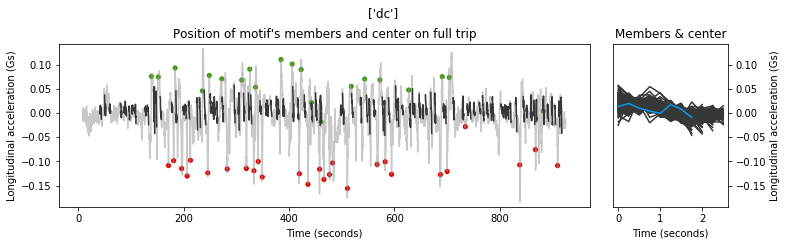

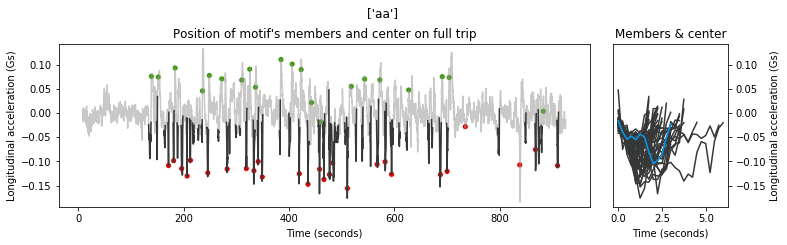

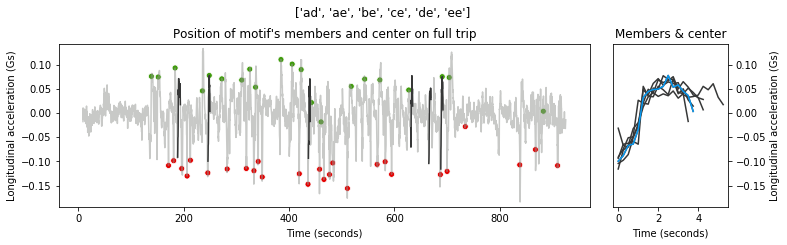

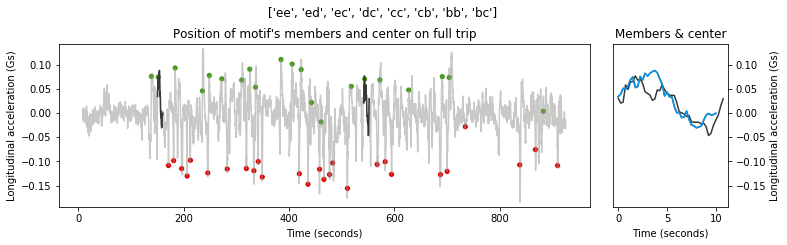

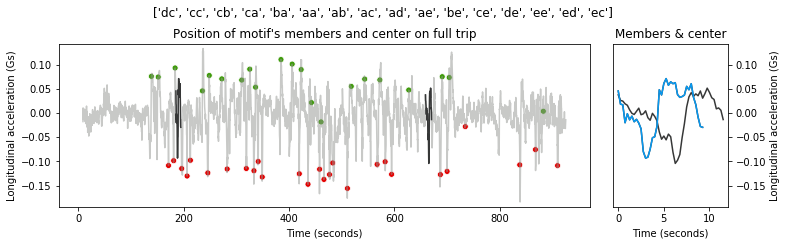

In [34]:
lon_viz.plot_k_lon_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [35]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,498,516,['aa'],133.75,138.25
1,558,565,['aa'],148.75,150.50
2,615,624,['aa'],163.00,165.25
3,645,652,['aa'],170.50,172.25
4,684,691,['aa'],180.25,182.00
5,714,722,['aa'],187.75,189.75
6,744,758,['aa'],195.25,198.75
7,785,793,['aa'],205.50,207.50
8,809,818,['aa'],211.50,213.75
9,831,843,['aa'],217.00,220.00


In [36]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "acc_detection_rate": motif_utils.compute_acc_detection_rate(pruned_motif_dic_list, trip_df),
    "brake_detection_rate": motif_utils.compute_brake_detection_rate(pruned_motif_dic_list, trip_df),
}
lon_results_list.append(results_dic)

<a id='section4'></a>
## 4. Parameter sweep - 10Hz

In [37]:
freq_per_second = 10

### 4.1) 2 seconds windows &  4-letter sax words

In [38]:
paa_size = 4
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['az'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
Motif candidates of size 19 successfully extracted
Motif candidates of size 20 successfully

2615

In [39]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_lon_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,acc_events,acc_ratio,brake_events,brake_ratio
0,[ddcc],50577.43,0.04,24,63,1,0.015873,0,0.000000
1,[deee],57271.67,0.06,20,38,13,0.342105,0,0.000000
2,[baaa],57889.17,0.07,20,34,0,0.000000,8,0.235294
3,[aabd],65957.52,0.06,20,18,0,0.000000,3,0.166667
4,"[ccca, ccba, ccaa, cbaa, caaa, baaa, aaaa, aaa...",78737.42,0.06,49,4,0,0.000000,2,0.500000
5,"[aade, aaee, abee, acee, adee, aeee, beee, cee...",81604.71,0.07,72,4,3,0.750000,0,0.000000
6,"[deee, eeee, eeed, eedd, eedc, eddc, edcc, ddc...",82929.51,0.05,81,2,1,0.500000,0,0.000000
7,"[dccc, cccc, cccb, ccca, ccba, ccaa, cbaa, caa...",85549.63,0.04,71,2,0,0.000000,1,0.500000
8,[aaba],86469.95,0.04,20,2,0,0.000000,1,0.500000


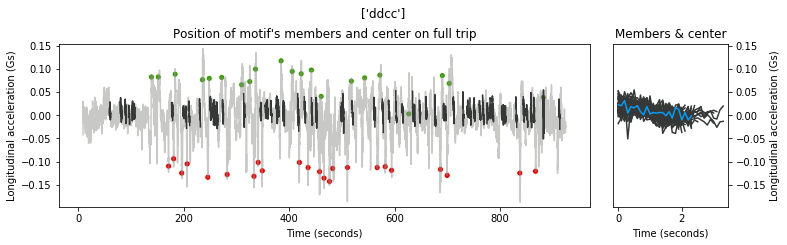

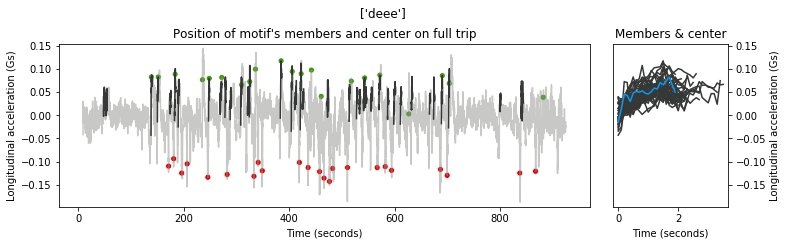

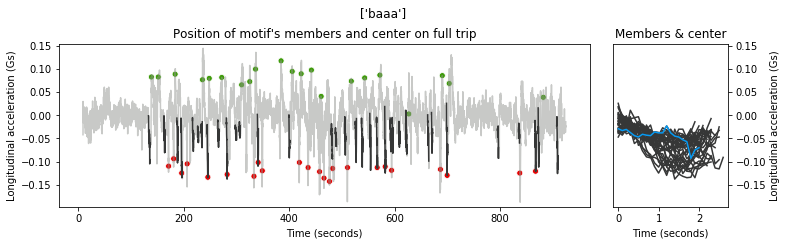

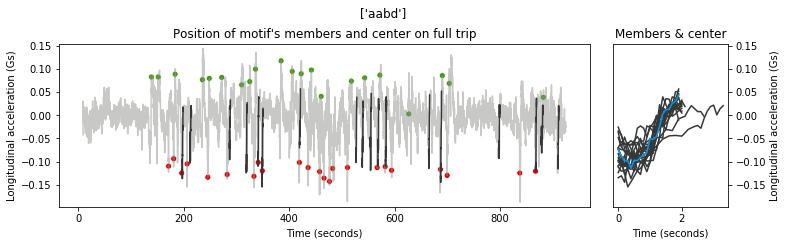

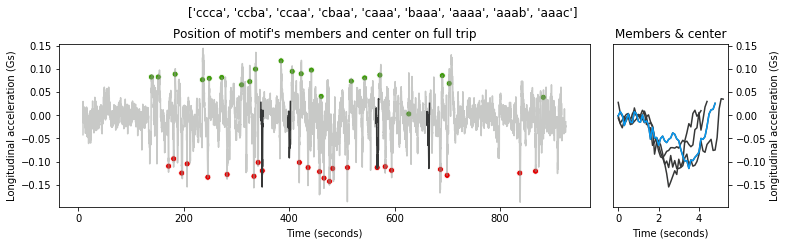

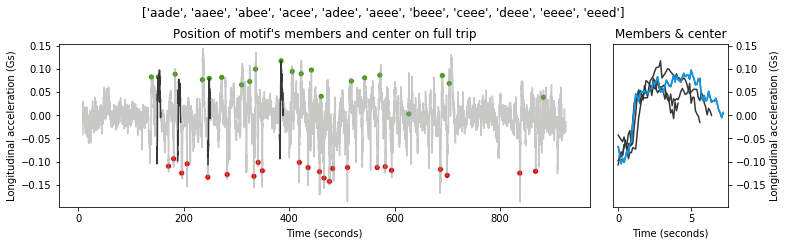

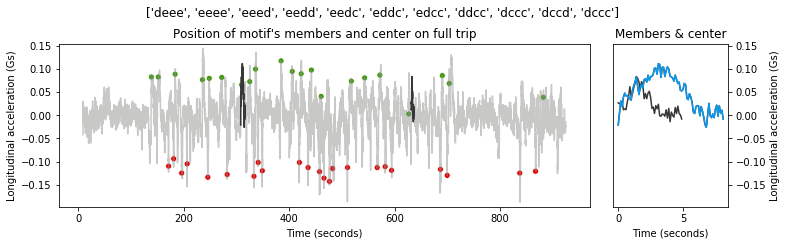

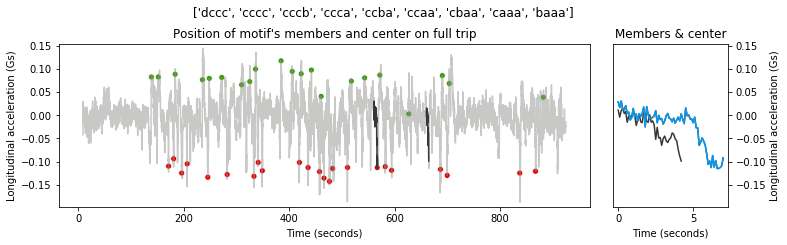

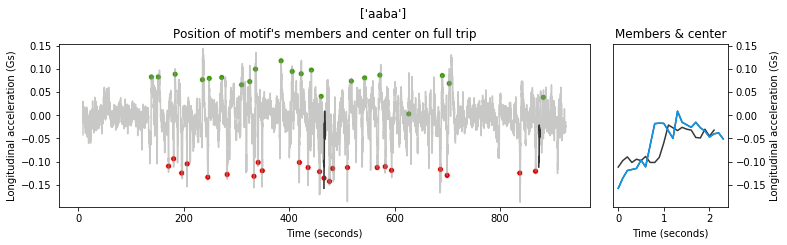

In [40]:
lon_viz.plot_k_lon_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [41]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,375,397,['deee'],48.2,50.5
1,416,436,['deee'],52.4,55.0
2,1222,1242,['deee'],138.2,140.2
3,1342,1361,['deee'],150.3,152.2
4,1567,1586,['deee'],174.1,176.0
5,1653,1675,['deee'],182.8,185.5
6,1711,1730,['deee'],189.8,191.7
7,2254,2273,['deee'],247.3,249.3
8,2466,2489,['deee'],268.8,272.3
9,2550,2570,['deee'],278.4,280.5


In [42]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "acc_detection_rate": motif_utils.compute_acc_detection_rate(pruned_motif_dic_list, trip_df),
    "brake_detection_rate": motif_utils.compute_brake_detection_rate(pruned_motif_dic_list, trip_df),
}
lon_results_list.append(results_dic)

### 4.2) 2 seconds windows & 2-letter sax words

In [43]:
paa_size = 2
win_size = freq_per_second * 2

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['az'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
ExtendedMD algorithm run in 6.73 minutes


1272

In [44]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_lon_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,acc_events,acc_ratio,brake_events,brake_ratio
0,[dc],32331.95,0.06,29,91,2,0.021978,0,0.000000
1,"[aa, ab]",45264.63,0.07,26,34,0,0.000000,14,0.411765
2,"[ae, be, ce]",57355.10,0.07,27,11,2,0.181818,0,0.000000
3,"[da, ca]",59319.90,0.06,26,9,0,0.000000,3,0.333333
4,"[ac, ad, ae, be, ce, de, ee, ed, ec]",67924.69,0.07,83,3,2,0.666667,0,0.000000
5,"[db, da, ca, ba, aa, ab, ac, ad, ae, be, ce, de]",72605.32,0.05,48,2,1,0.500000,0,0.000000
6,"[ab, ac, ad, bd, cd, dd, dc, db, cb]",75091.27,0.03,54,2,0,0.000000,0,0.000000
7,"[bb, ba, ca]",76043.11,0.04,29,2,0,0.000000,0,0.000000


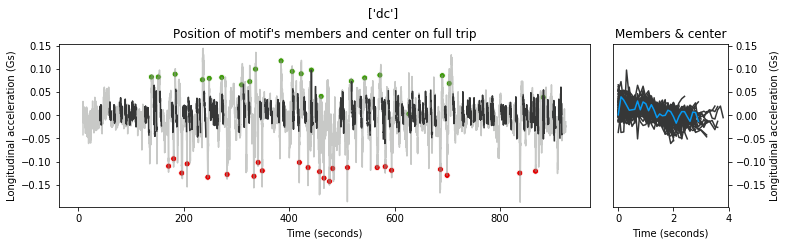

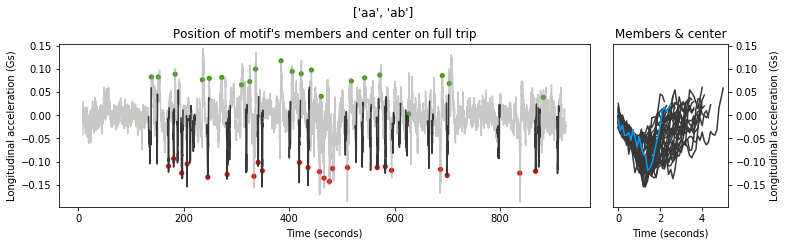

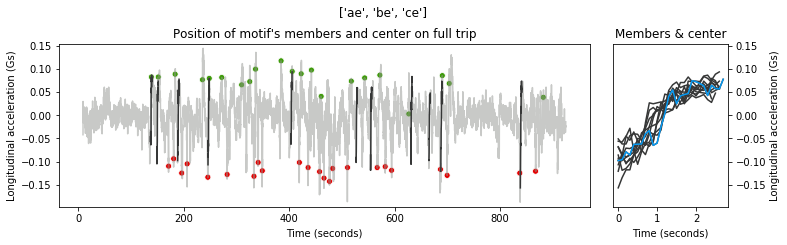

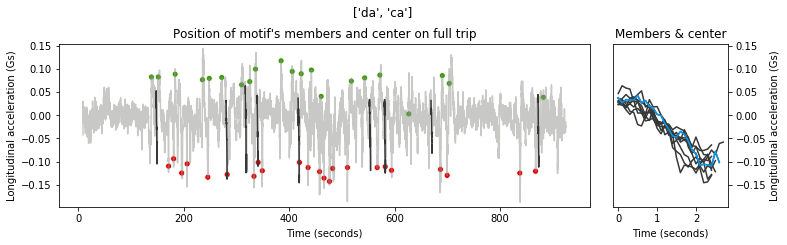

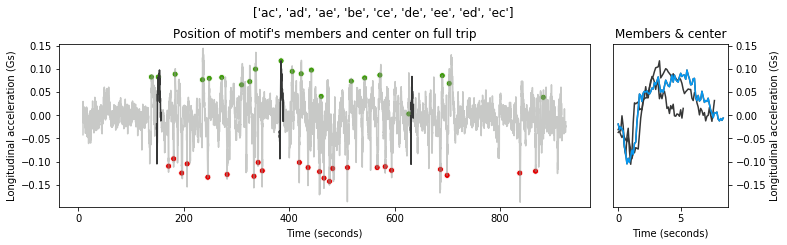

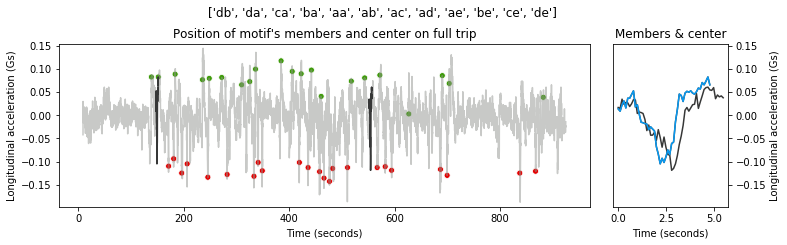

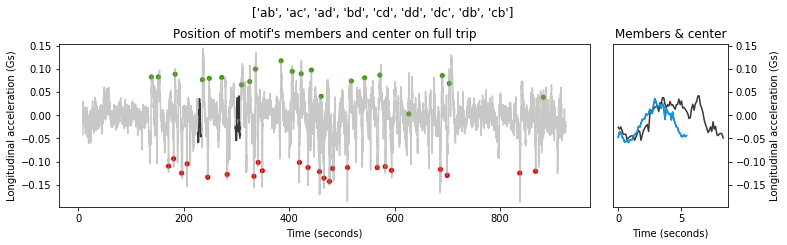

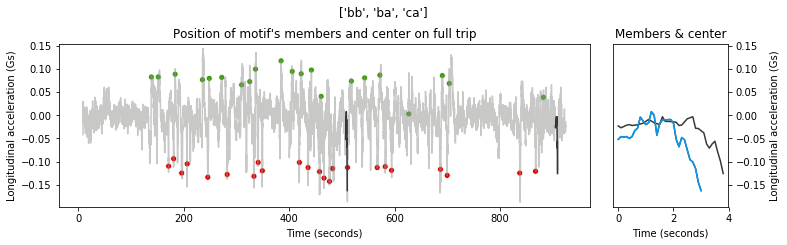

In [45]:
lon_viz.plot_k_lon_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [46]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,1180,1226,"['aa', 'ab']",133.6,138.6
1,1325,1346,"['aa', 'ab']",148.5,150.7
2,1529,1551,"['aa', 'ab']",170.3,172.5
3,1625,1650,"['aa', 'ab']",180.0,182.5
4,1689,1715,"['aa', 'ab']",187.4,190.2
5,1764,1803,"['aa', 'ab']",195.1,199.0
6,1867,1892,"['aa', 'ab']",205.4,207.9
7,1923,1947,"['aa', 'ab']",211.3,214.5
8,1969,2008,"['aa', 'ab']",217.0,220.9
9,2223,2258,"['aa', 'ab']",244.2,247.7


In [47]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "acc_detection_rate": motif_utils.compute_acc_detection_rate(pruned_motif_dic_list, trip_df),
    "brake_detection_rate": motif_utils.compute_brake_detection_rate(pruned_motif_dic_list, trip_df),
}
lon_results_list.append(results_dic)

### 4.3) 1 second window & 2-letter sax words

In [48]:
paa_size = 2
win_size = freq_per_second * 1

driver_df = uah_utils.get_full_point_uah_data(data_folder, freq_per_second)
trip_df = driver_df[driver_df['trip_id']=='20151221120051'].reset_index(drop=True)
ts = trip_df['az'].values

start_time = time.time()
motif_dic_list, ts_1d = find_motifs_from_emd(ts, R, win_size, paa_size, alphabet_size, adaptive_break_points)
print("ExtendedMD algorithm run in {} minutes".format(round((time.time() - start_time)/60, 2)))

len(motif_dic_list)

Motif candidates of size 1 successfully extracted
Motif candidates of size 2 successfully extracted
Motif candidates of size 3 successfully extracted
Motif candidates of size 4 successfully extracted
Motif candidates of size 5 successfully extracted
Motif candidates of size 6 successfully extracted
Motif candidates of size 7 successfully extracted
Motif candidates of size 8 successfully extracted
Motif candidates of size 9 successfully extracted
Motif candidates of size 10 successfully extracted
Motif candidates of size 11 successfully extracted
Motif candidates of size 12 successfully extracted
Motif candidates of size 13 successfully extracted
Motif candidates of size 14 successfully extracted
Motif candidates of size 15 successfully extracted
Motif candidates of size 16 successfully extracted
Motif candidates of size 17 successfully extracted
Motif candidates of size 18 successfully extracted
Motif candidates of size 19 successfully extracted
Motif candidates of size 20 successfully

1892

In [49]:
pruned_motif_dic_list = prune_motifs_with_mdl(ts, motif_dic_list, R)
pruned_motif_df = motif_utils.get_motif_lon_labels_df(pruned_motif_dic_list, trip_df)
pruned_motif_df

,pattern,mdl_cost,mean_dist,pattern_len,n_motifs,acc_events,acc_ratio,brake_events,brake_ratio
0,[cc],31246.10,0.05,10,158,1,0.006329,0,0.000000
1,"[ee, ed]",41427.83,0.07,28,52,15,0.288462,0,0.000000
2,"[dc, cc, cb, ca, ba, aa, ab]",64546.71,0.07,56,7,0,0.000000,5,0.714286
3,"[ab, ac, ad, ae, be, ce, de, ee, ed]",69619.07,0.07,39,6,4,0.666667,0,0.000000
4,"[de, ee, ed, dd, dc, cc, cb, ca, ba]",74673.32,0.05,78,2,0,0.000000,0,0.000000
5,"[cb, ca, ba, aa, ab, ac, ad, ae, be, ce, de, e...",75741.71,0.05,82,2,2,1.000000,0,0.000000
6,"[ab, bb, bc, cc, cb, ca, ba]",76689.96,0.05,72,2,0,0.000000,0,0.000000


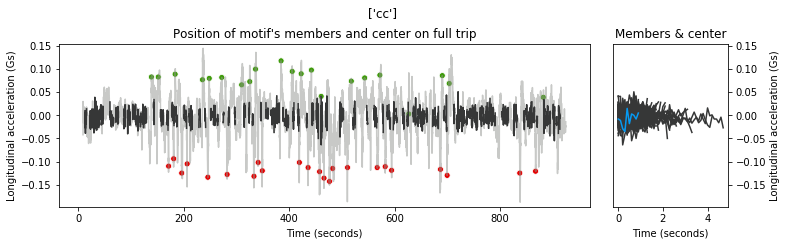

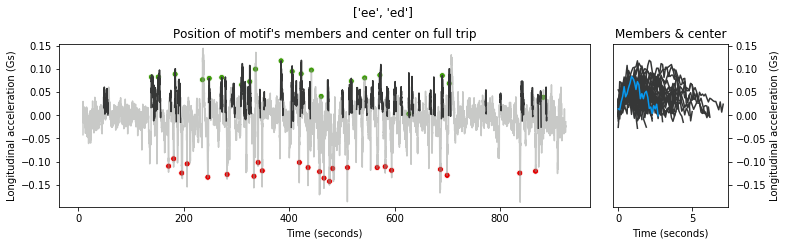

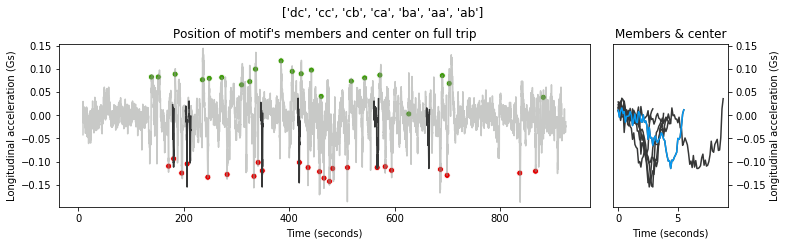

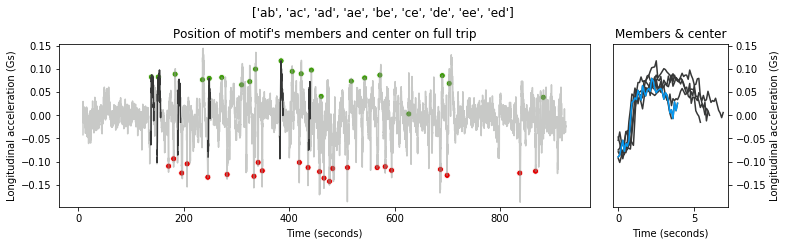

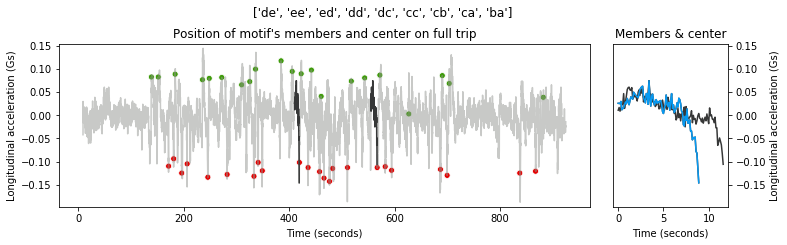

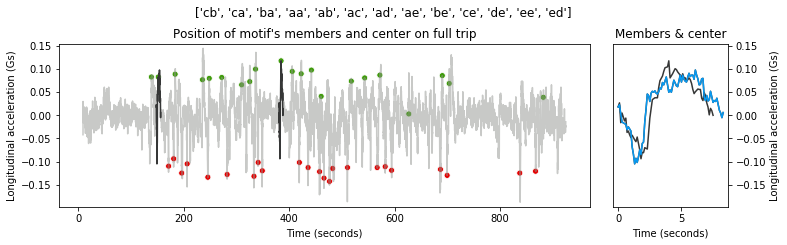

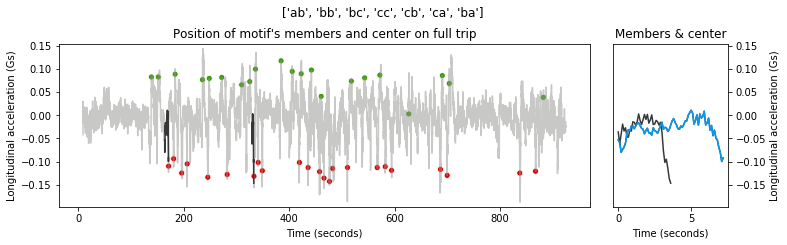

In [50]:
lon_viz.plot_k_lon_motifs(len(pruned_motif_df), trip_df, pruned_motif_dic_list)

In [51]:
motif_utils.get_limits_df(pruned_motif_dic_list[1:], trip_df)

,start,end,pattern,start_ts,end_ts
0,380,402,"['ee', 'ed']",48.7,51.0
1,426,446,"['ee', 'ed']",53.4,56.5
2,1224,1274,"['ee', 'ed']",138.4,143.4
3,1279,1290,"['ee', 'ed']",143.9,145.0
4,1296,1316,"['ee', 'ed']",145.6,147.6
5,1343,1403,"['ee', 'ed']",150.4,156.5
6,1572,1591,"['ee', 'ed']",174.6,176.5
7,1657,1680,"['ee', 'ed']",183.2,186.2
8,1712,1756,"['ee', 'ed']",189.9,194.3
9,2255,2284,"['ee', 'ed']",247.4,250.4


In [52]:
results_dic = {
    "freq_per_second": freq_per_second,
    "paa_size": paa_size,
    "win_size": win_size/freq_per_second,
    "n_motifs": len(motif_dic_list),
    "n_prunned_motifs": len(pruned_motif_dic_list),
    "acc_detection_rate": motif_utils.compute_acc_detection_rate(pruned_motif_dic_list, trip_df),
    "brake_detection_rate": motif_utils.compute_brake_detection_rate(pruned_motif_dic_list, trip_df),
}
lon_results_list.append(results_dic)

<a id='section5'></a>
## 5. Summary table

In [53]:
pd.DataFrame(lon_results_list, columns=["freq_per_second", "paa_size", "win_size", "n_motifs",
                                        "n_prunned_motifs", "acc_detection_rate", "brake_detection_rate"])

,freq_per_second,paa_size,win_size,n_motifs,n_prunned_motifs,acc_detection_rate,brake_detection_rate
0,2,4,2.0,1464,3,0.285714,0.629630
1,2,2,2.0,947,3,0.238095,0.185185
2,2,4,4.0,978,4,0.142857,0.296296
3,2,2,4.0,730,3,0.190476,0.407407
4,4,4,2.0,2191,5,0.285714,0.814815
5,4,2,2.0,1341,5,0.333333,0.925926
6,10,4,2.0,2615,9,0.666667,0.434783
7,10,2,2.0,1272,8,0.285714,0.608696
8,10,2,1.0,1892,7,0.761905,0.217391
